In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

In [2]:
folder_path = '/Users/jinalee/Desktop/Topic_modeling/ver. 3'

In [3]:
# load file
def load_books(folder_path):
    book_texts = []
    book_titles = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as file:
                book_texts.append(file.read())
                book_titles.append(filename)
    return book_texts, book_titles

In [4]:
texts, titles = load_books(folder_path)

# Tokenize
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]


In [5]:
# Coherence scores for LDA
def compute_coherence_scores_lda(dictionary, corpus, texts, max_topics, step=1):
    coherence_scores = []
    for n_topics in range(2, max_topics + 1, step):
        # Apply LDA
        lda_model = LdaModel(
            corpus=corpus,
            num_topics=n_topics,
            id2word=dictionary,
            random_state=42,
            passes=10,
            iterations=100
        )
        
        coherence_model = CoherenceModel(
            model=lda_model,
            texts=texts,
            dictionary=dictionary,
            coherence="c_v"
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append((n_topics, coherence_score))
        print(f"Number of Topics: {n_topics}, Coherence Score: {coherence_score}")
    return coherence_scores

In [6]:
max_topics = 45  
coherence_scores = compute_coherence_scores_lda(dictionary, corpus, tokenized_texts, max_topics)


Number of Topics: 2, Coherence Score: 0.27835979730475086
Number of Topics: 3, Coherence Score: 0.2595125192025825
Number of Topics: 4, Coherence Score: 0.2646878522960825
Number of Topics: 5, Coherence Score: 0.2555309427013501
Number of Topics: 6, Coherence Score: 0.29861193279200143
Number of Topics: 7, Coherence Score: 0.2828271337474302
Number of Topics: 8, Coherence Score: 0.31031562987531924
Number of Topics: 9, Coherence Score: 0.2864991565552863
Number of Topics: 10, Coherence Score: 0.2753200239347377
Number of Topics: 11, Coherence Score: 0.28995350909641765
Number of Topics: 12, Coherence Score: 0.32526855327140775
Number of Topics: 13, Coherence Score: 0.30606275978695374
Number of Topics: 14, Coherence Score: 0.3131228933532753
Number of Topics: 15, Coherence Score: 0.3071383372392601
Number of Topics: 16, Coherence Score: 0.31328756612335323
Number of Topics: 17, Coherence Score: 0.3146396565934588
Number of Topics: 18, Coherence Score: 0.30016329937209196
Number of Topi

In [7]:
# Best number of topics
coherence_df = pd.DataFrame(coherence_scores, columns=["Num Topics", "Coherence Score"])
best_num_topics = coherence_df.loc[coherence_df["Coherence Score"].idxmax(), "Num Topics"]
print(f"Best Number of Topics: {best_num_topics}")

Best Number of Topics: 24


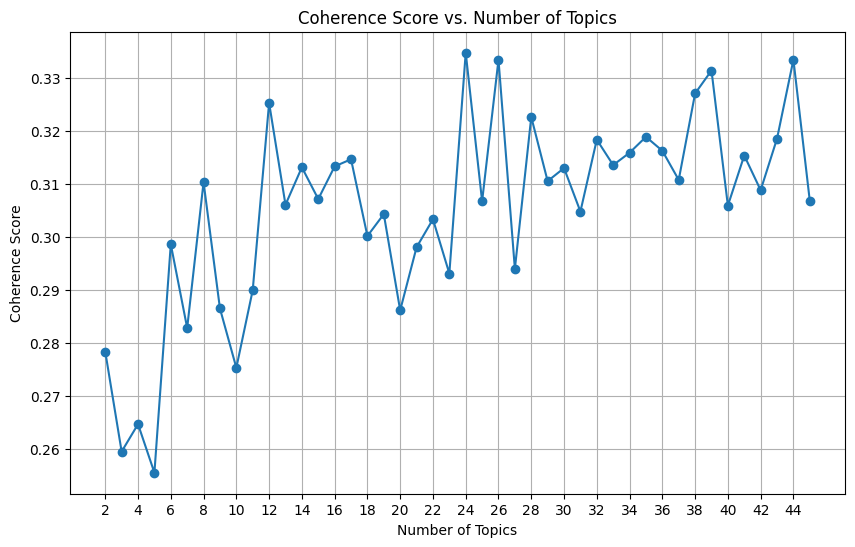

In [8]:
# Coherence scores
plt.figure(figsize=(10, 6))
plt.plot(coherence_df["Num Topics"], coherence_df["Coherence Score"], marker='o')
plt.title("Coherence Score vs. Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.xticks(range(2, max_topics + 1, 2))
plt.grid()
plt.show()

In [9]:
# LDA with the best number of topics
lda_model = LdaModel(
    corpus=corpus,
    num_topics=best_num_topics,
    id2word=dictionary,
    random_state=42,
    passes=10,
    iterations=100
)


In [10]:
#Top words
def display_topics_lda(model, no_top_words=10):
    for topic_idx, topic in model.show_topics(num_topics=-1, num_words=no_top_words, formatted=False):
        top_words = [word for word, _ in topic]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

print("\nTop words for each topic:")
display_topics_lda(lda_model)


Top words for each topic:
Topic 1: snowwhite, go, make, come, dwarf, see, take, bear, princess, queen
Topic 2: go, fire, get, boy, child, father, come, sit, make, man
Topic 3: prince, king, water, brother, ride, come, life, dwarf, go, tell
Topic 4: match, cold, light, wall, warm, girl, burn, grandmother, large, hand
Topic 5: fred, catherine, run, think, door, go, cheese, come, make, beer
Topic 6: princess, large, go, woman, gerda, emperor, snow, look, stand, eye
Topic 7: man, boy, house, soldier, pewter, young, stand, toad, go, come
Topic 8: king, go, come, see, queen, daughter, sister, tell, child, day
Topic 9: child, man, sit, go, think, get, take, look, ask, fire
Topic 10: tailor, giant, king, come, tree, go, great, man, jump, sit
Topic 11: go, soldier, sit, see, princess, man, think, take, hand, lady
Topic 12: man, shadow, go, shoe, think, sit, come, dance, learn, thou
Topic 13: go, large, look, gerda, stand, woman, eye, snow, sit, get
Topic 14: snail, burdock, whole, forest, silv